# Importing important libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
df=pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [4]:
df.shape

(195, 24)

The column Name, is a Redundant column which is not useful for Analysis, and will it will be dropped.

In [5]:
# Dropping The Name Column
df.drop(['name'], axis=1, inplace=True)

In [6]:
df.shape

(195, 23)

In [7]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
# Checking For Duplicate Rows In Dataset
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Data Analysis And Visualization

<AxesSubplot:xlabel='status', ylabel='count'>

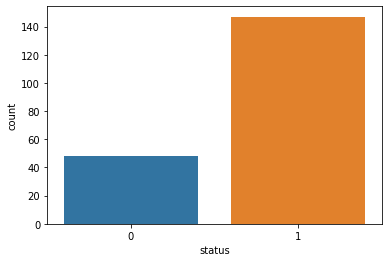

In [10]:
#cheaking Balance of Data
sns.countplot(x='status',data=df)

<AxesSubplot:>

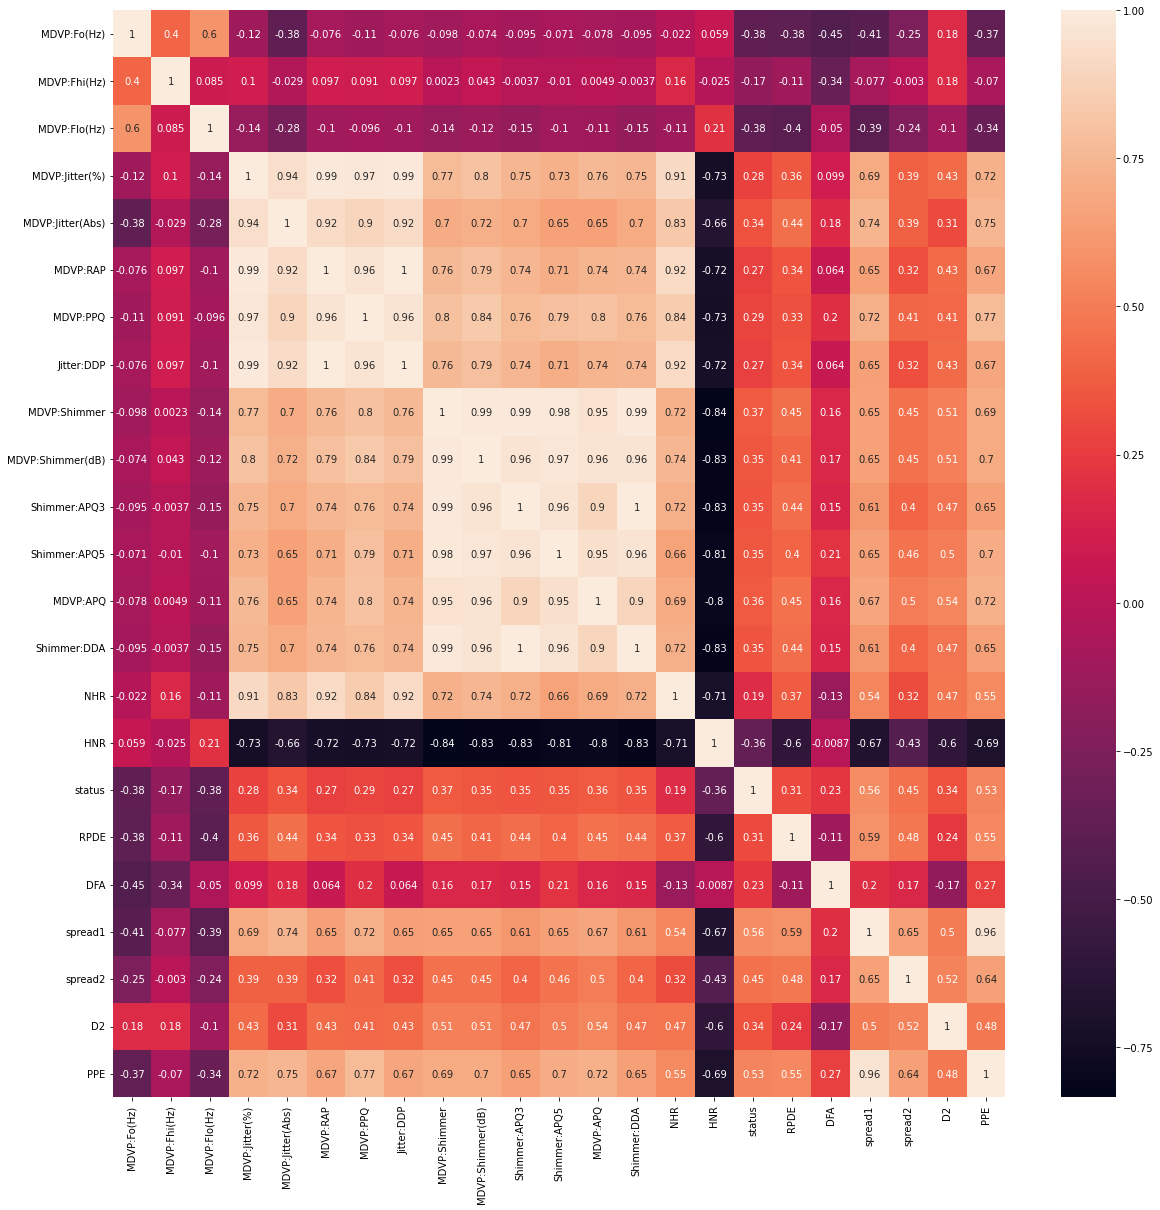

In [11]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df.corr(),annot=True,ax=ax)

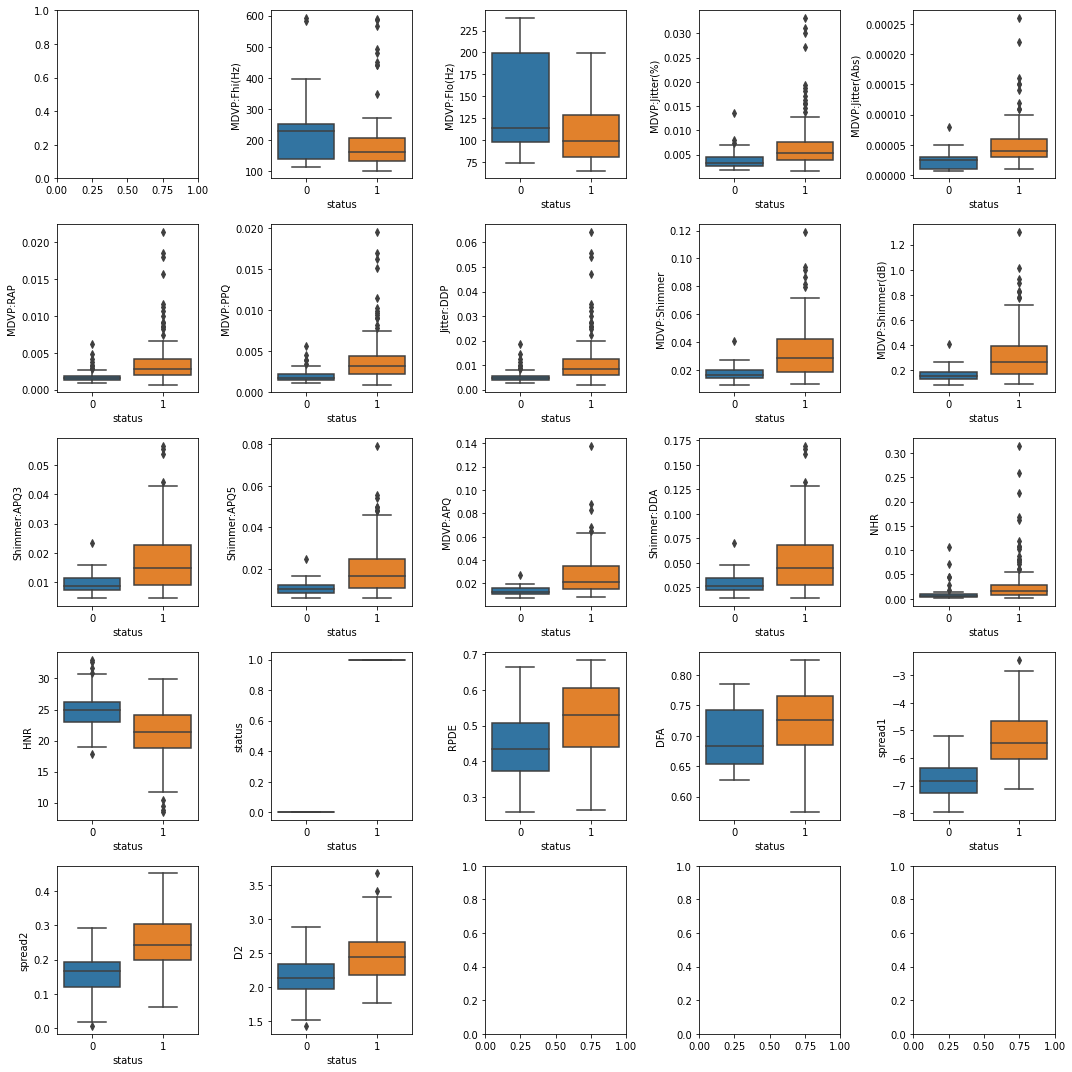

In [12]:
#Box Plot
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

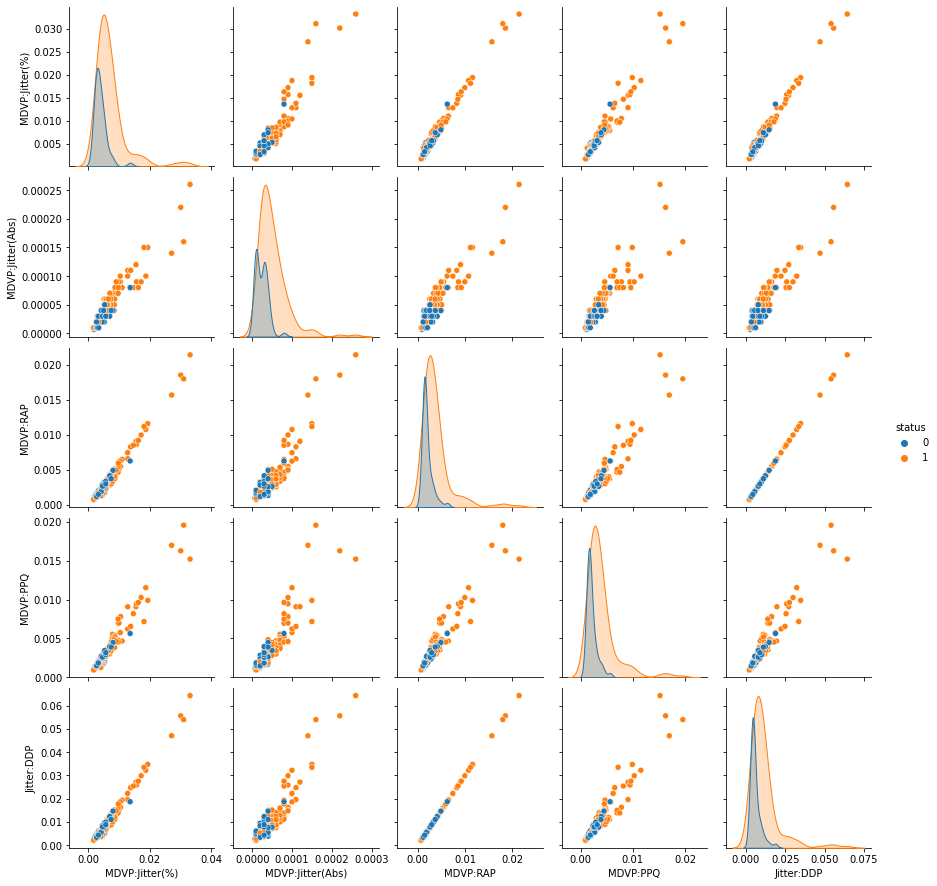

In [13]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'] )
plt.show()

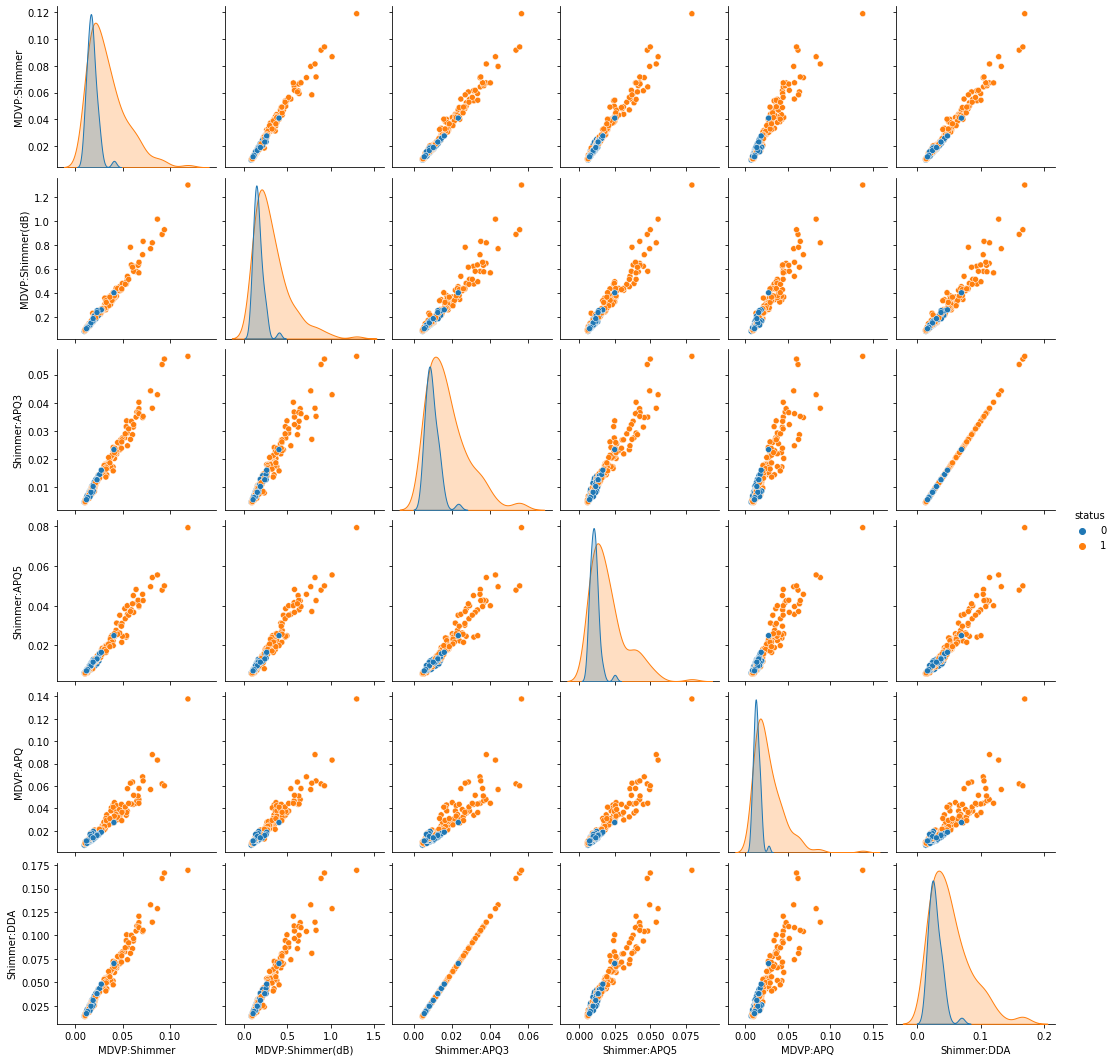

In [14]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()

# Correcting the Imabalance In Dataset by SMOTE.

In [15]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [16]:
X = df.drop(['status'], axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (195, 22)
Target (y) Shape Before Balancing : (195,)


In [17]:
!pip install imblearn 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=300)


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
X, y = sm.fit_resample(X, y)

In [19]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (294, 22)
Target (y) Shape After Balancing : (294,)


# Splitting the Data

In [20]:
x = df.drop(columns = 'status')
y = df['status']

In [21]:
x.max()

MDVP:Fo(Hz)         260.105000
MDVP:Fhi(Hz)        592.030000
MDVP:Flo(Hz)        239.170000
MDVP:Jitter(%)        0.033160
MDVP:Jitter(Abs)      0.000260
MDVP:RAP              0.021440
MDVP:PPQ              0.019580
Jitter:DDP            0.064330
MDVP:Shimmer          0.119080
MDVP:Shimmer(dB)      1.302000
Shimmer:APQ3          0.056470
Shimmer:APQ5          0.079400
MDVP:APQ              0.137780
Shimmer:DDA           0.169420
NHR                   0.314820
HNR                  33.047000
RPDE                  0.685151
DFA                   0.825288
spread1              -2.434031
spread2               0.450493
D2                    3.671155
PPE                   0.527367
dtype: float64

In [22]:
x.min()

MDVP:Fo(Hz)          88.333000
MDVP:Fhi(Hz)        102.145000
MDVP:Flo(Hz)         65.476000
MDVP:Jitter(%)        0.001680
MDVP:Jitter(Abs)      0.000007
MDVP:RAP              0.000680
MDVP:PPQ              0.000920
Jitter:DDP            0.002040
MDVP:Shimmer          0.009540
MDVP:Shimmer(dB)      0.085000
Shimmer:APQ3          0.004550
Shimmer:APQ5          0.005700
MDVP:APQ              0.007190
Shimmer:DDA           0.013640
NHR                   0.000650
HNR                   8.441000
RPDE                  0.256570
DFA                   0.574282
spread1              -7.964984
spread2               0.006274
D2                    1.423287
PPE                   0.044539
dtype: float64

In [23]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [25]:
scaler.scale_

array([7.52315250e-03, 2.16492859e-03, 6.12549923e-03, 6.00240096e+01,
       7.14285714e+03, 9.58772771e+01, 9.81354269e+01, 3.19795331e+01,
       1.64041995e+01, 1.44092219e+00, 3.01932367e+01, 2.50501002e+01,
       1.68293504e+01, 1.00654253e+01, 6.10016470e+00, 6.48424329e-02,
       2.51979932e+00, 5.18642609e+00, 2.58511825e-01, 2.69874212e+00,
       6.68320091e-01, 3.05771124e+00])

As all data are in array form. We will use pandas dataframe to convert them into dataframe.

In [26]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns=x_test.columns)

In [27]:
x_train_scaled.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.178714,0.051824,0.251822,0.086404,0.130435,0.070328,0.053591,0.070156,0.007212,0.010682,...,0.007045,0.016048,0.052806,0.747826,0.459996,0.500008,0.194354,0.330168,0.402704,0.141493
1,0.166005,0.235580,0.195902,0.115311,0.169960,0.092486,0.136120,0.092471,0.076776,0.064092,...,0.079409,0.068366,0.035459,0.554499,0.949444,0.327618,0.500116,0.451340,0.310127,0.430516
2,0.703322,0.276287,0.252761,0.036213,0.011858,0.038054,0.032154,0.038208,0.082801,0.069844,...,0.050770,0.100205,0.025655,0.695481,0.185373,0.416691,0.167146,0.136689,0.461550,0.118007
3,0.512004,0.255644,0.346207,0.111817,0.090909,0.105491,0.117899,0.105635,0.507303,0.406738,...,0.303545,0.619335,0.151478,0.222751,0.804798,0.663550,0.442946,0.660204,0.762172,0.365408
4,0.686922,0.253549,0.152820,0.103875,0.051383,0.112717,0.082529,0.112538,0.105076,0.101890,...,0.067769,0.125562,0.031289,0.545517,0.160983,0.561098,0.223338,0.394911,0.673895,0.147001


# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [29]:
y_pred_lr=reg.predict(x_test_scaled)

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix,r2_score

print('Precision: ',precision_score(y_test, y_pred_lr))
print('Recall: ',recall_score(y_test, y_pred_lr))
print('f1_score: ',f1_score(y_test,y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr, labels=(1,0)))
print("Training Score: ", reg.score(x_train_scaled, y_train)*100)

Precision:  0.8648648648648649
Recall:  1.0
f1_score:  0.927536231884058
[[32  0]
 [ 5  2]]
Training Score:  86.53846153846155


# PLioting Confusion Matrix

In [31]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds,labels=(1,0)),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

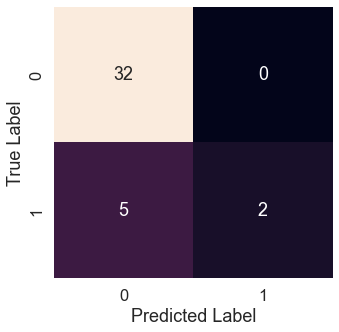

In [32]:
conf_matrix(y_test,y_pred_lr)

In [33]:
reg_acc = accuracy_score(y_test, y_pred_lr)*100
reg_acc

87.17948717948718

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train_scaled,y_train)



KNeighborsClassifier()

In [35]:
y_pred_knn=knn.predict(x_test_scaled)

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix,r2_score

print('Precision: ',precision_score(y_test, y_pred_knn))
print('Recall: ',recall_score(y_test, y_pred_knn))
print('f1_score: ',f1_score(y_test,y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn, labels=(1,0)))
print("Training Score: ", knn.score(x_train_scaled, y_train)*100)

Precision:  0.9375
Recall:  0.9375
f1_score:  0.9375
[[30  2]
 [ 2  5]]
Training Score:  94.23076923076923


In [37]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds,labels=(1,0)),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

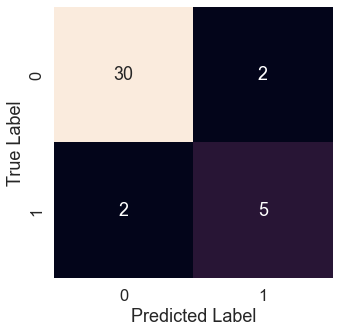

In [38]:
conf_matrix(y_test,y_pred_knn)

In [39]:
knn_acc = accuracy_score(y_test, y_pred_knn)*100
knn_acc

89.74358974358975

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train_scaled,y_train)



DecisionTreeClassifier()

In [41]:
y_pred_dt=dt.predict(x_test_scaled)

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix,r2_score

print('Precision: ',precision_score(y_test, y_pred_dt))
print('Recall: ',recall_score(y_test, y_pred_dt))
print('f1_score: ',f1_score(y_test,y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt, labels=(1,0)))
print("Training Score: ", dt.score(x_train_scaled, y_train)*100)

Precision:  0.9117647058823529
Recall:  0.96875
f1_score:  0.9393939393939394
[[31  1]
 [ 3  4]]
Training Score:  100.0


In [43]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds,labels=(1,0)),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

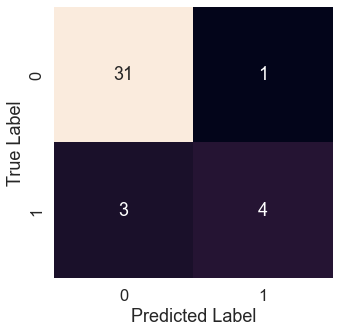

In [44]:
conf_matrix(y_test,y_pred_dt)

In [45]:
dt_acc = accuracy_score(y_test, y_pred_dt)*100
dt_acc

89.74358974358975

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [47]:
y_pred_rf=rf.predict(x_test_scaled)

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix,r2_score

print('Precision: ',precision_score(y_test, y_pred_rf))
print('Recall: ',recall_score(y_test, y_pred_rf))
print('f1_score: ',f1_score(y_test,y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf, labels=(1,0)))
print("Training Score: ", rf.score(x_train_scaled, y_train)*100)

Precision:  0.9142857142857143
Recall:  1.0
f1_score:  0.955223880597015
[[32  0]
 [ 3  4]]
Training Score:  100.0


In [49]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds,labels=(1,0)),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

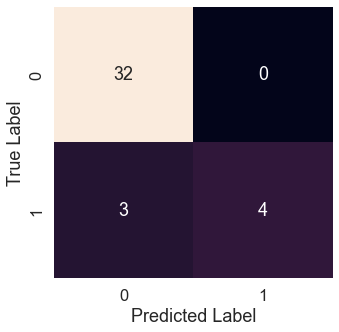

In [50]:
conf_matrix(y_test,y_pred_rf)

In [51]:
rf_acc = accuracy_score(y_test, y_pred_rf)*100
rf_acc

92.3076923076923